# Numeric data
Falls into these **3 types:**
1. categorical
  - Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method
2. discrete (ask: how many?)
  - Discrete variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects. 
3. continuous variables (ask: how much?)
  - Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received. 

### Methods to preprocess numeric data
1. onehot encoding
2. binning
3. normalization
4. standardization

### Techniques to encode data in specific ways

* One-hot
  - the idea that a column with e.g countries is changed into many columns (each country has its own column) and then 0 or 1 indicate if that country is present in the data row
* Binning
  - grouping values into bins/categories eg: 1-10, 11-20, 21-30
  - replacing values with categories
* Normalisation
  - data for machine learning must be 1. binary (2 possible values), 2. nummeric, or 3. categorical
  - nummeric data must be normalized by eg converting to standard diviation from mean (whereby values will range between -6.0 and +6.0 and thus be comparable to other data of different scale.
* Standardisation
  - a standardization object is created to hold all features (dependend and independent) in a standardized and normalized form with values like 1, -1, (0,0,1.0,0) and -1.34
* Dealing with missing features
  1. Removing the feature from dataset if it’s highly correlated with another data.
  2. Guessing it’s value on different factors if it’s moderately correlated with another data.
  3. Removing the training examples that have any feature missing/
  4. Setting the missing features to 0 (remember to scale accordingly every feature to <-1, 1>).
  5. Preprocessing the data to a different format that better handle missing values.
  6. Selecting a model that handle missing values better (eg. use a neural network instead of decision tree)

## One-hot encoding

Imagine $n$ features. One-hot encoding means setting **one** feature to 1 and the rest to 0.

Example:
### Encoding wednesday
 * Features `[M, T, W, T, F, S, S]`: `[0, 0, 1, 0, 0, 0, 0]`  
 
### Encoding female
 * Features `[M, F]`: `[0, 1]`

With sklearn.preprocessing.OneHotEncoder we get an object, that can be used to transform n number of existing values to a binary array of length n. for each observation feature.

In [3]:
# Use OneHotEncoder to transform matrix of Strings to matrix of bits with col count = number of categories in the data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
xs = [['Male'], ['Female'], ['Female']]
encoder.fit_transform(xs).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.]])

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
xs = [['Male', 1], ['Female', 3], ['Female', 2], ['Male', 3]]
print('col1 is female, col2 is male, col3 is 1, col4 is 2, col5 is 3')
data_encoded = encoder.fit_transform(xs)
print(type(data_encoded))
data_encoded.todense() # creates a numpy matrix out of the scipy sparse matrix. Sparse data is data that has mostly unused elements (elements that don't carry any information ).


col1 is female, col2 is male, col3 is 1, col4 is 2, col5 is 3
<class 'scipy.sparse.csr.csr_matrix'>


matrix([[0., 1., 1., 0., 0.],
        [1., 0., 0., 0., 1.],
        [1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 1.]])

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document? Is it?',
]
vectorizer = CountVectorizer()

fit = vectorizer.fit_transform(corpus)
print(type(fit))
res = fit.todense() # returns a numpy array of same shape
document_idx = vectorizer.vocabulary_['document']
print(document_idx)
document_count = sum(res[:,document_idx]) # sum all row cells where column == index
print('document occurs {} times in the text'.format(document_count))
print('{} is the index for document'.format(document_idx))
mat = fit.toarray()
print('There are 9 different words in the 4 sentences\n',vectorizer.get_feature_names())
print('In second sentence document occurs twice, which tells us that "document" is in second collumn')
print(res)
print('------------------------')
print(mat)
print('------------------------')

<class 'scipy.sparse.csr.csr_matrix'>
1
document occurs [[4]] times in the text
1 is the index for document
There are 9 different words in the 4 sentences
 ['and', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third', 'this']
In second sentence document occurs twice, which tells us that "document" is in second collumn
[[0 1 1 1 0 0 0 1 0 1]
 [0 2 0 1 0 0 1 1 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [0 1 1 2 1 0 0 1 0 1]]
------------------------
[[0 1 1 1 0 0 0 1 0 1]
 [0 2 0 1 0 0 1 1 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [0 1 1 2 1 0 0 1 0 1]]
------------------------


In [2]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third', 'this']


## 01 Exercise

* Use the `CountVectorizer` from `sklearn.feature_extraction` to read the book `data/moby_dick.txt`
  * How many times does the word 'wood' appear?

## Binning
Example source: https://pbpython.com/pandas-qcut-cut.html   
With pandas **`qcut()` and `cut()`** methods:
1. qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins
2. cut devides into equal sized categories based on edges of bins


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

raw_df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/2018_Sales_Total_v2.xlsx?raw=true')
raw_df[-10:-1]

,account number,name,sku,quantity,unit price,ext price,date
1497,424914,White-Trantow,S1-82801,21,95.75,2010.75,2018-12-22 03:31:36
1498,424914,White-Trantow,S2-83881,5,88.19,440.95,2018-12-17 00:46:26
1499,424914,White-Trantow,S2-00301,-1,22.99,-22.99,2018-12-26 07:14:09
1500,424914,White-Trantow,S1-06532,55,68.74,3780.70,2018-11-19 23:45:09
1501,424914,White-Trantow,S2-34077,35,41.43,1450.05,2018-11-22 09:11:53
1502,424914,White-Trantow,B1-69924,37,42.77,1582.49,2018-11-27 14:29:02
1503,424914,White-Trantow,S1-47412,16,65.58,1049.28,2018-12-19 15:15:41
1504,424914,White-Trantow,B1-86481,75,28.89,2166.75,2018-12-29 13:03:54
1505,424914,White-Trantow,S1-82801,20,95.75,1915.00,2018-12-22 03:31:36


In [11]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()
print(f'{len(df)} different accounts')
df.head()

20 different accounts


,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


### dataframe histogram
A histogram is a representation of the distribution of data. This function groups the values of all given Series in the DataFrame into bins and draws all bins in one matplotlib.axes.Axes. This is useful when the DataFrame’s Series are in a similar scale.

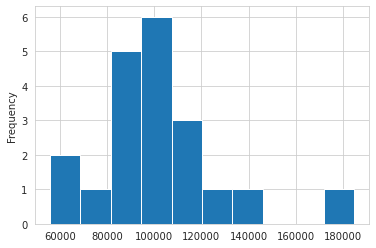

In [5]:
df['ext price'].plot(kind='hist')

In [16]:
# See how data can be cut by procentile 0-25%,25-50%,etc..
df['ext price'].describe()[['25%','50%','75%']]

25%     89137.7075
50%    100271.5350
75%    110132.5525
Name: ext price, dtype: float64

In [28]:
# devide samples into equally sized buckets and tell os the start,end of each bucket
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4) # ext price devided into 4 buckets/bins using pandas .qcut() method
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0) # 10% samples in each category. precision floating point 0
# Give labels to each bucket
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1], # 20% in each
                              labels=bin_labels_5)

# retbins gives us the bin edges
results, bin_edges = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])
print(results_table)
df

    Threshold      Tier
0   55733.050    Bronze
1   87167.958    Silver
2   95908.156      Gold
3  103605.970  Platinum
4  112290.054   Diamond


,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,"(89137.708, 100271.535]","(87168.0, 90686.0]",Silver
6,307599,"Kassulke, Ondricka and Metz",86451.07,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
7,383080,Will LLC,104437.60,"(100271.535, 110132.552]","(103606.0, 105938.0]",Platinum
8,412290,Jerde-Hilpert,112591.43,"(110132.552, 184793.7]","(112290.0, 124778.0]",Diamond
9,424914,White-Trantow,184793.70,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond


## cut()

In [31]:
df['cut4'] = pd.cut(df['ext price'], bins=4)
df['cut4'].value_counts() # with cut we get the edges evenly distributed, but samples are not.

(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: cut4, dtype: int64

## Feature scaling
Standardization vs Normalization  
##### Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:

<img src="images/normalization.png">

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

    When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
    On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
    If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

 
###### Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:
<img src="images/standardization.png">


Feature scaling: Mu is the mean of the feature values and Feature scaling: Sigma is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

##### Which to choose?
At the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

##### Normalizing with min-max scaler
The common way.

In [2]:
from sklearn import preprocessing
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/VolodyaCO/e-Marketing_Konrad2019/master/california_housing_train.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [3]:
scaler = preprocessing.MinMaxScaler()
names = housing.columns
d = scaler.fit_transform(housing)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


#### Using the normalize() method
less common

In [64]:
# normalizing a matrix
from sklearn import preprocessing
import numpy as np

a = np.random.random((2, 10))
a = a*100
print("Data = ", a, '\n')

# normalize the data attributes
normalized = preprocessing.normalize(a)
print("Normalized Data = ", normalized)

Data =  [[41.32678248 84.50669631 75.64413851 42.4096542  96.27844838  5.85873179
   9.98471361 97.09734412 35.7439706  55.91584138]
 [82.7193091  96.27365609 50.02587807 69.67017979  9.67631195 42.13416271
   4.35533327 44.15572676 23.41199829 90.63931788]] 

Normalized Data =  [[0.20766031 0.42463229 0.38009939 0.21310156 0.48378342 0.02943917
  0.05017155 0.48789823 0.17960759 0.28096793]
 [0.43555276 0.50692223 0.26340778 0.36684348 0.05094995 0.2218545
  0.0229327  0.2324989  0.12327425 0.47725501]]


In [57]:
# get the 1990 california housing data
from sklearn import preprocessing
import pandas as pd
housing = pd.read_csv('https://raw.githubusercontent.com/VolodyaCO/e-Marketing_Konrad2019/master/california_housing_train.csv')
housing

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...
16995,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [61]:
# normalizing a dataframe
housing_cols = housing.columns
d = preprocessing.normalize(housing)
scaled_df = pd.DataFrame(d, columns=housing_cols)
scaled_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.000223,0.083566,0.019105,0.015114,0.007028,0.000022,0.996180
1,0.000236,0.095036,0.023616,0.014026,0.005752,0.000023,0.995078
2,0.000198,0.008401,0.002030,0.003885,0.001365,0.000019,0.999954
3,0.000191,0.020445,0.004590,0.007015,0.003078,0.000043,0.999751
4,0.000305,0.022192,0.004976,0.009524,0.003999,0.000029,0.999688


#### Standardization
`from sklearn.preprocessing import StandardScaler`


In [68]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],[8, 0.05],[50, 0.005],[88, 0.07],[4, 0.1]])
print('Raw data:\n',data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print()
print('Standardized data:\n',scaled)

Raw data:
 [[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]

Standardized data:
 [[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


## Sets

* Empty set: $Ø = \{\}$
* Non-empty set: $\{1\}$
* Non-empty set: $\{Red, Green\}$
* Distinct
  * Set of the list $[1, 2, 2, 3]$ is $\{1, 2, 3\}$
  * Set of $[Red, Green, Yellow, Green]$ is $\{Red, Green, Yellow\}$
* Order doesn't matter
  * $\{Red, Green\} == \{Green, Red\}$

## Different sets

* The empty set, $Ø = \{\}$
* All the students in this class
* All the natural numbers, $\mathbb{N} = \{0, 1, 2, 3, 4 \dots\}$


* All the integers, $\mathbb{Z} = \{-\infty, \dots, -1, 0, 1, \dots, \infty\}$
* All the rational numbers $\mathbb{Q} = \{0, -2, 10, \frac{-2832}{123}, \frac{72}{1923892}, \frac{67821}{1298732}, \dots \}$
* All the real numbers, $\mathbb{R} = \{0, -2, 10, \frac{-2832}{123}, \frac{72}{1923892}, \frac{67821}{1298732}, \sqrt 2, \pi, \dots, \infty\}$

## Set membership

* $4 \in \{1, 2, 3, 4, 5\}$
  * 4 **is a member of** the set $\{1, 2, 3, 4, 5\}$
* $7 \notin \{1, 2, 3, 4, 5\}$
  * 7 **is not a member of** the set $\{1, 2, 3, 4, 5\}$

## Exercise on sets
<table>
<tr><td>
  
</td><td><img src="images/numbersystem.png"/></td>
</tr>
</table>


**Which expressions are true:?**
<u>
    <li>$4 \in \mathbb{R}$</li>
    <li>$\pi \in \mathbb{Q}$</li>
    <li>$\frac{2}{3} \in \mathbb{R}$</li>
    <li>$\sqrt 2 \notin \mathbb{Q}$</li>
    <li>$-5 \in \mathbb{N}$</li>
    <li>$log(7) \notin \mathbb{Q}$</li>
</u>